In [1]:
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

paired = sns.color_palette("Paired", 10)

BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import h5py
hf = h5py.File('cryosphere_energy_imbalance.h5', 'r')
time = np.squeeze(hf['time'])

def plot_ts(ax,comp,c_1,c_2,time=time):
    ts = np.squeeze(hf[comp])
    ts_95ci = np.squeeze(hf[comp + '_error'])
    
    plt.plot(time,ts,color=c_2,linestyle='-',markersize=5)
    ax.fill_between(time, ts + ts_95ci, ts - ts_95ci,
                 alpha=0.3, edgecolor=c_1, facecolor=c_1, linewidth=0)
    ax.set_xlim([1979,2017])
    ax.set_xticks(range(1980,2020,5))

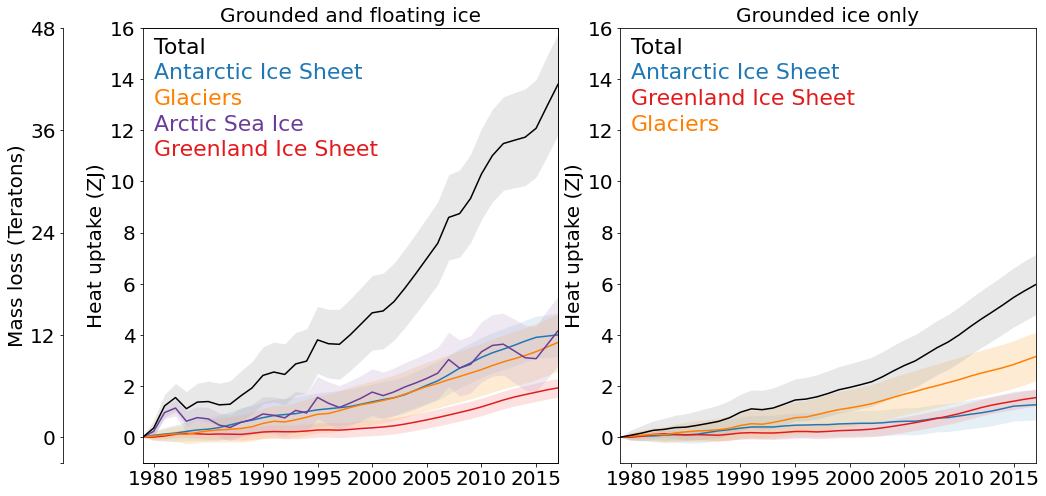

In [2]:
f = plt.figure()
f.set_size_inches(16, 8)

plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0.15)

ax1 = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)

plot_ts(ax1,'antarctica',paired[0],paired[1])
plot_ts(ax1,'greenland',paired[4],paired[5])
plot_ts(ax1,'glaciers',paired[6],paired[7])
plot_ts(ax1,'sea_ice',paired[8],paired[9])
plot_ts(ax1,'total',(0.7,0.7,0.7),'black')

ax1.text(1980,15,'Total',color='black',fontsize=22)
ax1.text(1980,14,'Antarctic Ice Sheet',color=paired[1],fontsize=22)
ax1.text(1980,11,'Greenland Ice Sheet',color=paired[5],fontsize=22)
ax1.text(1980,13,'Glaciers',color=paired[7],fontsize=22)
ax1.text(1980,12,'Arctic Sea Ice',color=paired[9],fontsize=22)

ax1.set_yticks(range(0,17,2));
ax1.set_ylim(-1, 16);
ax1.set_ylabel('Heat uptake (ZJ)')
ax1.set_title('Grounded and floating ice')

par1 = ax1.twinx()
par1.spines['left'].set_position(('outward', 80))      
par1.yaxis.set_ticks_position('left')
par1.set_ylabel('Mass loss (Teratons)')
par1.yaxis.set_label_position('left')

L = 3.34e5; #Latent heat
zj_gt_factor = 1e21/(L*1e12); #Factor to convert from Zetajoules to Gigatons

par1.set_ylim(-3, 48) #47.9 teratons = 16 ZJ
par1.set_yticks([-3,0,12,24,36,48])
par1.set_yticklabels(['','0','12','24','36','48']);

ax2 = plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1)
plot_ts(ax2,'antarctica_grounded',paired[0],paired[1])
plot_ts(ax2,'greenland_grounded_energy',paired[4],paired[5])
plot_ts(ax2,'glaciers_grounded',paired[6],paired[7])
plot_ts(ax2,'total_grounded',(0.7,0.7,0.7),'black')
ax2.set_ylabel('Heat uptake (ZJ)')
ax2.set_ylim([-1,16]);

ax2.text(1980,15,'Total',color='black',fontsize=22)
ax2.text(1980,14,'Antarctic Ice Sheet',color=paired[1],fontsize=22)
ax2.text(1980,13,'Greenland Ice Sheet',color=paired[5],fontsize=22)
ax2.text(1980,12,'Glaciers',color=paired[7],fontsize=22)
ax2.set_title('Grounded ice only');

Total SLR from antarctica_grounded = 10.543944715509241 mm
Total SLR from greenland_grounded = 11.916989517273844 mm
Total SLR from glaciers_grounded = 26.19259180908698 mm
Total SLR from total_grounded = 49.58537039882408 mm


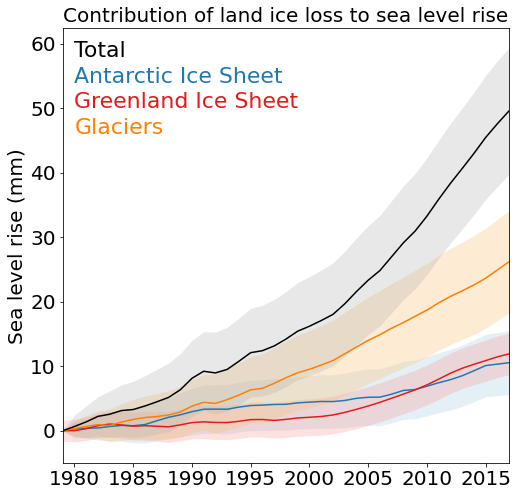

In [3]:
f = plt.figure()
f.set_size_inches(8, 8)

L = 3.34e5; #Latent heat
slr_zj_factor = 1e21/(360*L*1e12); #Factor to convert from Zetajoules to SLR (360 Gt = 1 mm global mean SLR)

def plot_ts_slr(ax,comp,c_1,c_2,time=time):
    ts = np.squeeze(hf[comp])*slr_zj_factor
    ts_95ci = np.squeeze(hf[comp + '_error'])*slr_zj_factor
    
    plt.plot(time,ts,color=c_2,linestyle='-',markersize=5)
    print('Total SLR from ' + comp + ' = ' + str(ts[-1]) + ' mm') 
    ax.fill_between(time, ts + ts_95ci, ts - ts_95ci,
                 alpha=0.3, edgecolor=c_1, facecolor=c_1, linewidth=0)
    ax.set_xlim([1979,2017])
    ax.set_xticks(range(1980,2020,5))

ax1 = plt.gca()
plot_ts_slr(ax1,'antarctica_grounded',paired[0],paired[1])
plot_ts_slr(ax1,'greenland_grounded',paired[4],paired[5])
plot_ts_slr(ax1,'glaciers_grounded',paired[6],paired[7])
plot_ts_slr(ax1,'total_grounded',(0.7,0.7,0.7),'black')
ax1.set_ylabel('Sea level rise (mm)')
plt.title('Contribution of land ice loss to sea level rise')

ax1.text(1980,58,'Total',color='black',fontsize=22)
ax1.text(1980,54,'Antarctic Ice Sheet',color=paired[1],fontsize=22)
ax1.text(1980,50,'Greenland Ice Sheet',color=paired[5],fontsize=22)
ax1.text(1980,46,'Glaciers',color=paired[7],fontsize=22)

ax1.set_xlim([1979,2017])
ax1.set_xticks(range(1980,2020,5));